<a href="https://colab.research.google.com/github/bruno2siqueira/Machine_Learning/blob/main/Atividade_4_COVID_RS_Aprendizado_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Atividade 4 - Aprendizado de Máquina: COVID-19**

* Por: Bruno Siqueira da Silva <<bruno.siqueira@inf.ufpel.edu.br>>
* Data: 05 de novembro de 2020

Abaixo as etapas do trabalho:

# 1 Preparação do ambiente

###1.1 Importação das bibliotecas



In [130]:
import matplotlib.pyplot as pt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from unicodedata import normalize
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2 Carregamento do arquivo

a.   Dados epidemiológicos da COVID-19 no Rio Grande do Sul, Secretaria Estadual de Saúde - SES

b. Disponível em: https://ti.saude.rs.gov.br/covid19/


####1.2.1 Fonte de dados obtidos da Secretaria Estadual de Saúde do RS

In [131]:
#Baixando diretamente da fonte.

!wget https://ti.saude.rs.gov.br/covid19/download
!mv download dados_covid_rs.csv  #disponibiliza no ambiente de produção

dados = pd.read_csv('/content/dados_covid_rs.csv', delimiter=';')
dados

--2020-11-05 23:25:58--  https://ti.saude.rs.gov.br/covid19/download
Resolving ti.saude.rs.gov.br (ti.saude.rs.gov.br)... 200.198.173.170
Connecting to ti.saude.rs.gov.br (ti.saude.rs.gov.br)|200.198.173.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘download’

download                [  <=>               ]  51.19M  6.49MB/s    in 9.1s    

2020-11-05 23:26:09 (5.64 MB/s) - ‘download’ saved [53676731]



,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,CONDICOES,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,HOSPITALIZACAO_SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,20 a 29,RT-PCR,11/09/2020,08/09/2020,NaN,RECUPERADO,NAO,SIM,NAO,SIM,NAO,NAO,Gestante,SIM,NaN,22/09/2020,NAO INFORMADO,NAO ENCONTRADO,NAO INFORMADO,NaN,NAO,E-SUS,BRASIL,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,19/10/2020,05/10/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,19/10/2020,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Masculino,15 a 19,RT-PCR,06/10/2020,06/10/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,20/10/2020,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,RT-PCR,05/10/2020,29/09/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,13/10/2020,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
4,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,30 a 39,TESTE RÁPIDO,30/07/2020,26/07/2020,NaN,RECUPERADO,NAO,NAO,SIM,SIM,NAO,NAO,Portador de doenças cromossômicas ou estado de...,NAO,NaN,09/08/2020,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254823,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,80 e mais,TESTE RÁPIDO,16/08/2020,16/08/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,SIM,NaN,NAO,NaN,30/08/2020,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
254824,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,20 a 29,TESTE RÁPIDO,20/08/2020,20/08/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,SIM,NaN,NAO,NaN,03/09/2020,BRANCA,NAO ENCONTRADO,NAO,ATLANTIDA,NAO,E-SUS,BRASIL,NAO
254825,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,50 a 59,RT-PCR,07/08/2020,02/08/2020,NaN,RECUPERADO,NAO,SIM,NAO,NAO,NAO,SIM,NaN,NAO,NaN,16/08/2020,PRETA,NAO ENCONTRADO,NAO,RAINHA DO MAR,NAO,E-SUS,BRASIL,NAO
254826,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,50 a 59,RT-PCR,10/08/2020,02/08/2020,NaN,RECUPERADO,NAO,SIM,NAO,SIM,NAO,SIM,NaN,NAO,NaN,16/08/2020,BRANCA,NAO ENCONTRADO,NAO,GUARA,NAO,E-SUS,BRASIL,NAO


# 2 Preparação dos dados

Nessa etapa, foi preciso converter os atributos categóricos para numéricos, ajustando o conteúdo dos atributos às restrições dos modelos utilizados no processo de Aprendizado de Máquina.

### 2.1 Tratando dados faltantes ou não-numéricos
Algumas colunas possuem "NaN" (Not a Number) ou "NaT" (Not a Time), indicando que são valores faltantes. Além disso, há colunas com tipos variados de registros, que não podem ser binarizados. 

*Ressalta-se que esta etapa considerou apenas dados potenciais utilizados no experimento.*



####2.1.1 Tratando colunas `FEBRE, TOSSE, GARGANTA e DISPENEIA`[texto do link](https://)

In [132]:
rows = []
for column in dados.columns:
  row = {'coluna': column, 'nans': dados[column].isnull().sum(), 'frac_nans': dados[column].isnull().sum() / dados.shape[0]}
  rows.append(row)
res = pd.DataFrame(rows)
res[res.nans>0].sort_values('nans', ascending=False)

,coluna,nans,frac_nans
19,DATA_INCLUSAO_OBITO,248874,0.976635
9,DATA_EVOLUCAO,235978,0.926029
17,CONDICOES,214755,0.842745
20,DATA_EVOLUCAO_ESTIMADA,28088,0.110223
27,PAIS_NASCIMENTO,11946,0.046879
22,ETNIA_INDIGENA,11592,0.045490
24,BAIRRO,4966,0.019488
15,DISPNEIA,3033,0.011902
12,FEBRE,20,0.000078
13,TOSSE,20,0.000078


a) Tratando a coluna `DISPNEIA`, com 3033 (1%) dos valores faltantes, preenchendo com valores aleatórios, mas que seguem a distribuição dos dados.

In [133]:
dist = dados["DISPNEIA"].value_counts(normalize=True)
faltantes = dados['DISPNEIA'].isnull()
dados.loc[faltantes,'DISPNEIA'] = np.random.choice(dist.index, size=len(dados[faltantes]), p=dist.values)

# Testando para ver se não há mais valores faltantes
dados["DISPNEIA"].isnull().any()

False

b) Tratando a coluna `FEBRE`, preenchendo os dados faltantes com valores aleatórios.

In [139]:
dist = dados["FEBRE"].value_counts(normalize=True)
faltantes = dados['FEBRE'].isnull()
dados.loc[faltantes,'FEBRE'] = np.random.choice(dist.index, size=len(dados[faltantes]), p=dist.values)

# Testando para ver se não há mais valores faltantes
dados["FEBRE"].isnull().any()

False

c) Tratando a coluna `TOSSE`, preenchendo os dados faltantes com valores aleatórios.

In [140]:
dist = dados["TOSSE"].value_counts(normalize=True)
faltantes = dados['TOSSE'].isnull()
dados.loc[faltantes,'TOSSE'] = np.random.choice(dist.index, size=len(dados[faltantes]), p=dist.values)

# Testando para ver se não há mais valores faltantes
dados["TOSSE"].isnull().any()

False

d) Tratando a coluna `GARGANTA`, preenchendo os dados faltantes com valores aleatórios

In [142]:
dist = dados["GARGANTA"].value_counts(normalize=True)
faltantes = dados['GARGANTA'].isnull()
dados.loc[faltantes,'GARGANTA'] = np.random.choice(dist.index, size=len(dados[faltantes]), p=dist.values)

# Testando para ver se não há mais valores faltantes
dados["GARGANTA"].isnull().any()

False

e) Tratando a coluna `OUTROS`, preenchendo os dados faltantes com valores aleatórios

In [143]:
dist = dados["OUTROS"].value_counts(normalize=True)
faltantes = dados['OUTROS'].isnull()
dados.loc[faltantes,'OUTROS'] = np.random.choice(dist.index, size=len(dados[faltantes]), p=dist.values)

# Testando para ver se não há mais valores faltantes
dados["OUTROS"].isnull().any()

False

####2.1.2 Tratando coluna `PROFISSIONAL_SAUDE`, com registros SIM, NAO e NAO INFORMADO 

Optou-se por esta coluna, considerando que os `Profissionais da Saúde` são indivíduos que circulam em espaços onde é realizado o atendimento de pacientes infectadas, com isso, podem ter maior chances de serem infectados.

In [144]:
dados['PROFISSIONAL_SAUDE']

0         NAO INFORMADO
1                   NAO
2                   NAO
3                   NAO
4                   NAO
              ...      
254823              NAO
254824              NAO
254825              NAO
254826              NAO
254827              NAO
Name: PROFISSIONAL_SAUDE, Length: 254828, dtype: object

In [147]:
dados["PROFISSIONAL_SAUDE"] = dados["PROFISSIONAL_SAUDE"].apply(lambda x: '1' if x=='SIM' else '0')

# Testando para ver se não há mais valores faltantes
dados["PROFISSIONAL_SAUDE"].isnull().any()

False

##2.2 Tranformando outro valores de String para Valores numéricos



In [148]:
#Problemas de ML trabalham melhor com dados numéricos

dados["SEXO"]= dados["SEXO"].apply(lambda x: '1' if x=='Masculino' else '0')
dados["FEBRE"]= dados["FEBRE"].apply(lambda x: '1' if x=='SIM' else '0')
dados["GARGANTA"]= dados["GARGANTA"].apply(lambda x: '1' if x=='SIM' else '0')
dados["TOSSE"]= dados["TOSSE"].apply(lambda x: '1' if x=='SIM' else '0')
dados["DISPNEIA"]= dados["DISPNEIA"].apply(lambda x: '1' if x=='SIM' else '0')
dados["HOSPITALIZADO"]= dados["HOSPITALIZADO"].apply(lambda x: '1' if x=='SIM' else '0')
dados["OUTROS"] = dados["OUTROS"].apply(lambda x: '1' if x=='SIM' else '0')

#Fitro com dados definidos como importantes para o modelo
dados = dados[['SEXO', 'FEBRE', 'TOSSE', 'GARGANTA',
               'DISPNEIA', 'PROFISSIONAL_SAUDE', 'OUTROS', 'HOSPITALIZADO']].reset_index(drop=True)

print ("Valores ajustados e atributos considerados selecionados!\n")
dados

Valores ajustados e atributos considerados selecionados!



,SEXO,FEBRE,TOSSE,GARGANTA,DISPNEIA,PROFISSIONAL_SAUDE,OUTROS,HOSPITALIZADO
0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
254823,0,0,0,0,0,0,0,0
254824,1,0,0,0,0,0,0,0
254825,1,1,0,0,0,0,0,0
254826,1,1,0,1,0,0,0,0



#3 Treinamento

a. Atributo alvo: 'HOSPITALIZADO'


In [149]:
dados['HOSPITALIZADO']= dados['HOSPITALIZADO'].astype(int)
nhosp = (dados['HOSPITALIZADO'].count()) -(dados['HOSPITALIZADO'].sum())
print ("Total de registros: ", dados['HOSPITALIZADO'].count(), 
       "\nNão Hospitalizados: ", nhosp,
       "\nHospitalizados:\t     ", dados['HOSPITALIZADO'].sum())

Total de registros:  254828 
Não Hospitalizados:  234299 
Hospitalizados:	      20529


###3.1 Método SKLearn

In [162]:
# O método train_test_split será utilizado para separação dos conjuntos, considerando 20% de dados de teste
from sklearn.model_selection import train_test_split

treino, teste = train_test_split(dados, test_size=0.2)


####3.1.1 Árvores de decisão (Decision Tree)

Este foi o modelo utilizado para prever o valor da variável destinométo. Trata-se de uma método de aprendizado supervisionado não paramétrico usado para classificação e regressão, que aprende a partir de regras de decisão simples inferidas dos recursos de dados.

Fonte: https://scikit-learn.org/stable/modules/tree.html

In [163]:
# DecisionTreeClassifier é uma classe capaz de realizar classificação multiclasse em um conjunto de dados.
from sklearn.tree import DecisionTreeClassifier 

modelo = DecisionTreeClassifier(random_state=0, criterion="entropy")

X_treino = treino.drop('HOSPITALIZADO', axis='columns')
y_treino = treino['HOSPITALIZADO']

print ("X Colunas selecionadas:\n", X_treino)
print ("Y Linhas selecionadas:\n", y_treino)

modelo_treinado = modelo.fit(X_treino, y_treino)

print ("\n\nModelo de treinamento:\n", modelo_treinado)

X Colunas selecionadas:
        SEXO FEBRE TOSSE GARGANTA DISPNEIA PROFISSIONAL_SAUDE OUTROS
83073     1     0     0        0        0                  0      0
148807    1     1     1        1        0                  0      0
227787    0     1     0        1        0                  0      0
105242    0     0     0        0        0                  0      0
25077     0     0     1        1        0                  0      0
...     ...   ...   ...      ...      ...                ...    ...
102013    1     1     1        1        0                  0      0
13317     1     0     0        1        0                  0      0
25978     1     0     0        0        0                  0      0
176108    1     0     0        0        0                  0      0
136034    1     0     0        0        1                  0      0

[203862 rows x 7 columns]
Y Linhas selecionadas:
 83073     0
148807    0
227787    0
105242    0
25077     0
         ..
102013    0
13317     0
25978     0


Depois de treinado, pode-se plotar a árvore com a função `plot_tree`. 

Techo abaixo foi comentado, pois é apenas ilustrativo.

In [106]:
from sklearn import tree
#tree.plot_tree(modelo_treinado) 

###3.2 Avaliação do modelo

Com o modelo treinado, temos que avaliá-lo no conjunto de teste. O sklearn implementa boa parte das métricas, bem como permite mostrar a matriz de confusão completa (CM). 

*CM mostra as frequências de classificação para cada classe do modelo*.

In [165]:
from sklearn.metrics import accuracy_score

# Separando os atributos e classes dos dados de teste
X_teste = teste.drop('HOSPITALIZADO', axis='columns')
y_teste = teste['HOSPITALIZADO']

# Passamos os exemplos sem classe pelo modelo treinado, que retorna a predicao em um vetor
predicoes = modelo_treinado.predict(X_teste)

# Com as predicoes, podemos calcular as métricas. Abaixo, a acurácia.
# Observe que sempre passamos os valores verdadeiros (y_teste) e depois as predicoes
acuracia = accuracy_score(y_teste, predicoes)
print("Acurácia do modelo: ", f"{acuracia:.1%}")
print("Diz quanto o meu modelo acertou das previsões possíveis")

Acurácia do modelo:  92.1%
Diz quanto o meu modelo acertou das previsões possíveis


###3.1.2 Matriz de Confusão

 A matriz de confusão apresenta uma precisão de **94%** para os casos que não demandam hospitalização '**0**', considerado melhor para os casos que demandam de hospitalização '**1**', que apresentou precisão de **52%**, conforme demonstrado abaixo. 

1. A métrica `precision` identifica qual a proporção de identificações positivas foi realmente correta. Em outras palavras, o qual bem meu modelo trabalhou.

2. A métrica `recall` identifica qual a proporção de positivos foram identificados corretamente. Ou seja, avalia o quão bom meu modelo é para prever positivos, sendo positivo entendido como a classe que se quer prever, no nosso contexto, se é um indivíduo não hospitalizado.

3. A métrica `f1-score` mostra o balanço entre a `precision` e o `recall` do  modelo.



In [168]:
from sklearn.metrics import classification_report

# 0 para NAO HOSPTALIZADO, 1 para HOSPTALIZADO
relatorio = classification_report(y_teste, predicoes)
print(relatorio)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     46810
           1       0.52      0.32      0.39      4156

    accuracy                           0.92     50966
   macro avg       0.73      0.64      0.68     50966
weighted avg       0.91      0.92      0.91     50966



Assim, este modelo:

Previu 0 `NAO HOSPITALIZADO` **97%** corretamente

Previu 1 `HOSPITALIZADO` **32%** corretamente

Previu 0 `NAO HOSPITALIZADO` **2%** incorretamente

Previu 1 `HOSPITALIZADO` **68%** incorretamente

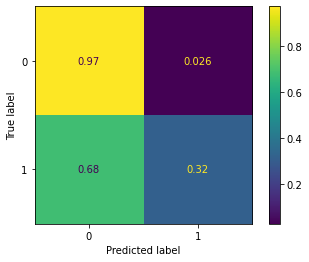

In [204]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelo_treinado, X_teste, y_teste, normalize='true')

###3.3 Método Bootstrapping

Técnica de validação cruzada

In [205]:
from sklearn.model_selection import ShuffleSplit

X = dados.drop('HOSPITALIZADO', axis='columns')
y = dados['HOSPITALIZADO']

# Vamos criar 10 separações, mantendo 20% de teste em cada uma
rs = ShuffleSplit(n_splits=10, test_size=.2)

# List para armazernamos as acurácias de cada modelo
acuracias = []

####3.2.1 Avaliação do Modelo

In [206]:
# Agora iteramos por cada separação e treinamos um modelo
# O método split retorna índices para o vetor passado como parametro
# O .loc é a maneira de indexar tabelas no pandas a partir de índices
for train_index, test_index in rs.split(X):
  modelo_treinado = modelo.fit(X.loc[train_index], y.loc[train_index])
  predicoes = modelo_treinado.predict(X.loc[test_index])
  acuracias.append(accuracy_score(y.loc[test_index], predicoes))

print(acuracias)
print("Média das acurácias: ", sum(acuracias) / len(acuracias))
#Uma abordagem seria estratificar a separação entre treino/teste. 
#A estratificação procura garantir que a distribuição dos dados é semelhante entre os grupos. 
#Ela pode ser feita tanto para atributos como para rótulos. 


[0.9202605658674411, 0.9201624612486756, 0.9198289055448731, 0.920476396028725, 0.9215947886826512, 0.9232037044304046, 0.9208295726562806, 0.9192991406035396, 0.9209669191225522, 0.9212219911313425]
Média das acurácias:  0.9207844445316488


A acurácia média obtida se manteve equivalente ao produzido pelo SKLearn.

###3.3 K-Fold

A validação cruzada *k-fold*, embaralha os dados separando-os em *k* partições, onde cada uma passa pelo treinamento contendo dados distintos. A função 'cross_val_score' disponível no SKLearn foi utilizada para gerar as médias dos modelos.

In [160]:
from sklearn.model_selection import cross_val_score

# O parâmetro cv indica quantas partições criaremos
scores = cross_val_score(modelo, X, y, cv=10)
print("Acurácia média: ", f"{scores.mean():.1%}")

Acurácia média:  92.0%


#4 Considerações Parciais

Para o conjunto de dados analisados, as técnicas utilizadas para treinamento,teste e validação, apresentaram resultados muito próximos, com acurácia acima de 92%. Tendo como atributo alvo a necessidade de hospitalização do paciente 'HOSPITALIZADO'. 

Os demais atributos selecionados nesta análise foram oportunos e ajudaram na precisão do modelo. 

Já atributos relacionados a faixa etária, sexo, região e evolução do quadro do paciente foram descartados, visto que em testes preliminares a correlação foi fraca. 